Data Preparation

In [231]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


**Loading Database**

In [232]:
#loading database
%load_ext sql
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @None'

**Loading Dataset** **And Previewing Dataset**

In [233]:
#Loading Data
Autolib = pd.read_csv('/content/Autolib_dataset (2).csv',  encoding = 'unicode_escape')
%sql DROP TABLE if EXISTS Autolib;
%sql PERSIST Autolib;
%sql select *from Autolib limit 5;


 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.


index,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,None,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,None,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,None,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,None,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,None,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,None,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,None,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,None,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,None,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,None,3,station,ok,nonexistent,2018,4,8,17,23


In [234]:
df = pd.read_csv('/content/Autolib_dataset (2).csv',  encoding = 'unicode_escape')
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


**Accessing Information about our Dataset**

In [235]:
#check the information of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [236]:
df.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


**Checking the quality of data**

In [237]:
#checking for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [238]:
#checking for null values
df.isnull()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [239]:
#drop the columns wilth null values that is"Displayed comment"and "Scheduled at"
df.drop( ["Displayed comment","Scheduled at"], 1, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃÂ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃÂ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


**checking the Outlier**

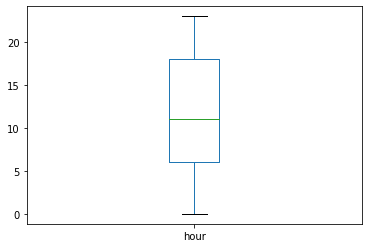

In [240]:
#checking outlier in hour column using Box plot
df.boxplot(column=["hour"],  grid = False)



In [241]:
#filter the dataset so that it can only display the month of April
df_april = df[df['month'] ==4]
df_april

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃÂ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃÂ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


Text(0, 0.5, 'Hour(s)')

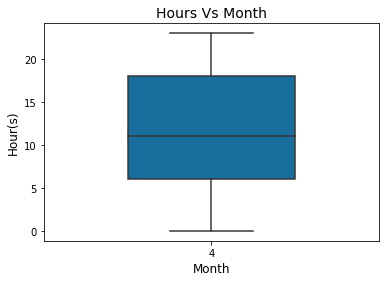

In [242]:
#checking outlier in hour vs month column using Box plot
bplot = sns.boxplot(y = 'hour', x='month', data=df_april, width = 0.5, palette = 'colorblind')
bplot.axes.set_title("Hours Vs Month", fontsize = 14)
bplot.set_xlabel("Month", fontsize = 12)
bplot.set_ylabel("Hour(s)", fontsize = 12)

In [243]:
#filter the dataset(df_april) so that it can only display the city Paris
df_paris = df_april[df_april["City"] =="Paris"]
df_paris

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,6,station,ok,nonexistent,2018,4,9,23,1
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,1,station,ok,nonexistent,2018,4,1,20,49
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1


In [244]:
#filter the dataset(df_paris) so that it can only display the Kind to be parking

df_kind = df_paris[df_paris["Kind"] =="PARKING"]
df_kind

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃÂ«n CÃÂ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,8,18,20
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018,4,4,15,2
12,6 avenue de la Porte de Champerret,5,5,1,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,0,station,ok,nonexistent,2018,4,5,12,22
18,26 villa Croix-Nivert,5,5,0,0,0,nonexistent,Paris,paris-cambronne-parking,PARKING,"48.84547, 2.30117",75015,Paris/Cambronne/Parking,operational,0,station,ok,nonexistent,2018,4,9,20,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,6 avenue Foch,0,0,0,0,0,nonexistent,Paris,paris-etoilefoch-parking,PARKING,"48.87366, 2.29201",75016,Paris/Etoile Foch/Parking,broken,0,station,closed,nonexistent,2018,4,3,14,37
4943,3 place du Louvre,0,0,0,0,0,nonexistent,Paris,paris-louvre-3,PARKING,"48.8593929, 2.3402943",75001,Paris/Louvre/3,operational,3,station,ok,nonexistent,2018,4,1,15,14
4961,69 boulevard Pasteur,0,0,0,0,0,nonexistent,Paris,paris-pasteur2-parking,PARKING,"48.84064, 2.3148",75015,Paris/Pasteur 2/Parking,broken,0,station,closed,nonexistent,2018,4,7,21,8
4966,41 boulevard de Rochechouart,0,0,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,6,station,ok,nonexistent,2018,4,1,4,40


Text(0, 0.5, 'Hour(s)')

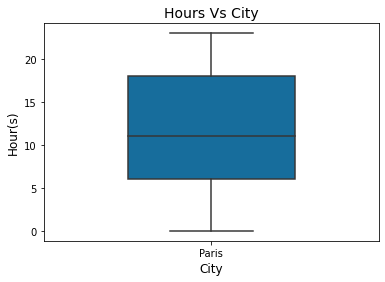

In [245]:
#checking outlier in hour Vs City column using Box plot
bplot = sns.boxplot(y = 'hour', x='City', data=df_paris, width = 0.5, palette = 'colorblind')
bplot.axes.set_title("Hours Vs City", fontsize = 14)
bplot.set_xlabel("City", fontsize = 12)
bplot.set_ylabel("Hour(s)", fontsize = 12)

**Data Visualization using Scatter Plot**

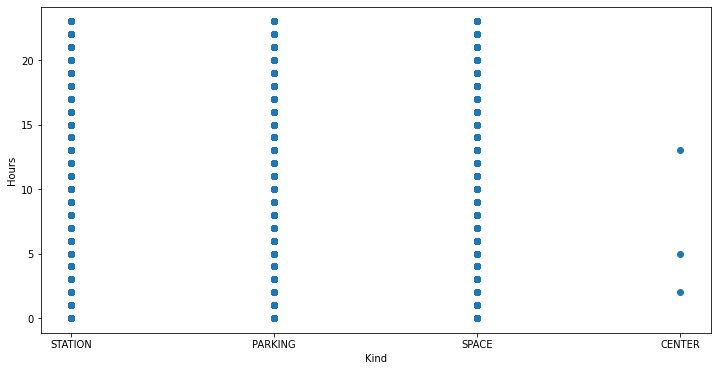

In [246]:
#visualization using scatter plot
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(df['Kind'], df['hour'])
ax.set_xlabel('Kind')
ax.set_ylabel('Hours')
plt.show()

**Solving the Questions**

In [247]:
#identify the most popular hour of the day for picking up a shared electric car
# in the city of Paris over the month of April 2018
%%sql
SELECT MAX(hour) from Autolib
WHERE City ='Paris' AND month = 4 AND year = 2018 AND Kind = 'STATION'
limit 5;






 * sqlite://
Done.


MAX(hour)
23


**Mode for Data in General**

In [258]:
#most popular valued in the Dataset
mode_values = df.mode(axis=0, dropna=True)
mode_values

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,8 Avenue de la Porte de Montrouge,0.0,0.0,0.0,0.0,0.0,nonexistent,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75015.0,Paris/Porte de Montrouge/8,operational,0.0,station,ok,nonexistent,2018.0,4.0,1,21.0,48.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN


In [248]:
# The most popular hour
hour_mod = df.mode(axis=0, dropna=True)
hour_mod['hour']


0    21.0
1     NaN
Name: hour, dtype: float64

In [249]:
#identify the most popular hour for returning the car
%%sql
SELECT MAX(hour) FROM Autolib
WHERE Kind = 'PARKING'
LIMIT 5;

 * sqlite://
Done.


MAX(hour)
23


In [250]:
#the most popular hour
hour_mod = df.mode(axis=0, dropna=False)
hour_mod[['hour']]

,hour
0,21.0
1,NaN


In [251]:
#Identify the most popular station overall
station_mod = df.mode(axis=0, dropna=True)
station_mod[['Station type']]



,Station type
0,station
1,NaN


In [270]:
#Identify the most popular station  at picking hour
%%sql
SELECT MAX("Station type") FROM Autolib
WHERE hour = 21;

 * sqlite://
Done.


"MAX(""Station type"")"
station


In [275]:
#Identify whether the most popular station belongs to that most popular postal code either
#overall or at the most popular picking hour
%%sql
SELECT MAX("Station type") FROM Autolib
WHERE hour = 21 AND "Postal code" =75015.0;


 * sqlite://
Done.


"MAX(""Station type"")"
station


**Analysis**

In [276]:
#number of cities
%%sql
SELECT COUNT(city) FROM Autolib;

 * sqlite://
Done.


COUNT(city)
5000


In [278]:
#display cities in the dataset
%%sql
SELECT distinct city FROM Autolib;

 * sqlite://
Done.


City
Paris
Le Bourget
Nanterre
Puteaux
Fontenay-aux-Roses
Le Chesnay
Suresnes
Versailles
Malakoff
Issy-les-Moulineaux


In [ ]:
#number of stations

In [279]:
%%sql
SELECT distinct Kind FROM Autolib;

 * sqlite://
Done.


Kind
STATION
PARKING
SPACE
CENTER


In [280]:
#display station type
%%sql
SELECT distinct "Station type" FROM Autolib;

 * sqlite://
Done.


Station type
station
full_station
subs_center


In [ ]:
#Number of hours